# Appling machine learning to audio analysis

## Trainning Code

### Libraries

In [2]:
### Dependencies were already installed previously on ubuntu
### Comet: experiment tracking and visual tools

from comet_ml import Experiment

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa # audio analysis
import librosa.display # this submodule needs to be imported explicitly
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import os

In [3]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# Keras now is fully integrated to Tensorflow, so to_categorical and Adam
# can't be imported directly from keras, therefore, the update:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [5]:
# To play audio file:
import IPython.display as ipd

In [6]:
# Create a Comet Experiment, to capture any and all artifacts
# such as audio files, visualization, model, dataset, system information and training metrics
experiment = Experiment(api_key = "Xa6eGiuYFngDcAJ9PVY1WpZp0", project_name = "SetA")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/negromontebs/seta/574fd9b276824725a096a1a47de0b1bd



## MFCCs - Mel-Frequency Cepstrum Coefficients

### Function to extract the MFCCs from every file in our dataset

In [7]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [8]:
df = pd.read_csv('../csvFiles/newTiming.csv')

In [9]:
from os.path import exists

In [10]:
sounds = []# Iterate through each sound file and extract the sound type
cont = 0 #Conta os ficheiros que tiveram os MFCCs analizados
i = 0 # numero total de ficheiros

for index, row in df.iterrows():
    file_name = df.loc[index]['fname']
    class_label = df.loc[index]['sound']
    
    if 'noise' in class_label:
        class_label = 'noise'
    
    print(class_label)
    i+=1
    
    if (exists(file_name)):
        file_size = os.path.getsize(file_name)
        
        if (file_size > 44):
            data = extract_features(file_name)
            
            sounds.append([data, class_label])
            cont += 1
        else:
            print(file_name)
            
print(i, cont)
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(sounds, columns=['soundtype','class_label'])

S1


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1750
  n_fft, y.shape[-1]


S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1751
  n_fft, y.shape[-1]


S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S1
S2
S

/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1222
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1122
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1888
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=927
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1694
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=833
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1764
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2018
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise


/home/picopreto/.virtualenvs/taad/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=792
  n_fft, y.shape[-1]


noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
noise
801 800


In [11]:
featuresdf
featuresdf.iloc[799]['class_label']
featuresdf.to_pickle('../MFCCs/cutA_toTrain.pkl') 

## Model building and training

### Load MFFCs from saved files

In [12]:
fileMFCCs = '../MFCCs/cutA_toTrain.pkl'
featuresdf = pd.read_pickle(fileMFCCs)

### Transform the data to arrays

In [29]:
keras.backend.clear_session()
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.soundtype.tolist())
y = np.array(featuresdf.class_label.tolist())


# Encode the classification labels
le = LabelEncoder()

yy = to_categorical(le.fit_transform(y))

### Trainning and test sets

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

### Neural Network architecture

In [31]:

num_labels = yy.shape[1]

filter_size = 2

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    
    return model

model = build_model_graph()

# Display model architecture summary 
model(x_train)
model.summary()# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (640, 512)                20992     
_________________________________________________________________
activation (Activation)      (640, 512)                0         
_________________________________________________________________
dropout (Dropout)            (640, 512)                0         
_________________________________________________________________
dense_1 (Dense)              (640, 512)                262656    
_________________________________________________________________
activation_1 (Activation)    (640, 512)                0         
_________________________________________________________________
dropout_1 (Dropout)          (640, 512)                0         
_________________________________________________________________
dense_2 (Dense)              (640, 512)                2

### Model Trainning

In [32]:
num_epochs = 700
num_batch_size = 32

csv_logger = keras.callbacks.CSVLogger('../model_save/cut_setA_Train_Hist_700.log')

model.fit(x_train, y_train, batch_size=num_batch_size,callbacks=[csv_logger], epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Epoch 1/700
20/20 [==============================] - 2s 9ms/step - loss: 22.3804 - accuracy: 0.4047 - val_loss: 4.3995 - val_accuracy: 0.6187
Epoch 2/700
20/20 [==============================] - 0s 8ms/step - loss: 11.7467 - accuracy: 0.4203 - val_loss: 1.3194 - val_accuracy: 0.6313
Epoch 3/700
20/20 [==============================] - 0s 8ms/step - loss: 6.0969 - accuracy: 0.4484 - val_loss: 1.1191 - val_accuracy: 0.6187
Epoch 4/700
20/20 [==============================] - 0s 8ms/step - loss: 4.4005 - accuracy: 0.4922 - val_loss: 0.9863 - val_accuracy: 0.6625
Epoch 5/700
20/20 [==============================] - 0s 7ms/step - loss: 3.3280 - accuracy: 0.4938 - val_loss: 0.8928 - val_accuracy: 0.6250
Epoch 6/700
20/20 [==============================] - 0s 7ms/step - loss: 2.8555 - accuracy: 0.5063 - val_loss: 0.8697 - val_accuracy: 0.6000
Epoch 7/700
20/20 [==============================] - 0s 10ms/step - loss: 2.4509 - accuracy: 0.5031 - val_loss: 0.7293 - val_accuracy: 0.7125
Epoch 8/70

Epoch 59/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.6672 - val_loss: 0.6231 - val_accuracy: 0.7563
Epoch 60/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6781 - val_loss: 0.6346 - val_accuracy: 0.7375
Epoch 61/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.6687 - val_loss: 0.6460 - val_accuracy: 0.7000
Epoch 62/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.6641 - val_loss: 0.6290 - val_accuracy: 0.7937
Epoch 63/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.6453 - val_loss: 0.6373 - val_accuracy: 0.7812
Epoch 64/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.6859 - val_loss: 0.6571 - val_accuracy: 0.7625
Epoch 65/700
20/20 [==============================] - 0s 5ms/step - loss: 0.6436 - accuracy: 0.6844 - val_loss: 0.6228 - val_accuracy: 0.7500
Epoch 

20/20 [==============================] - 0s 5ms/step - loss: 0.4072 - accuracy: 0.8016 - val_loss: 0.4393 - val_accuracy: 0.8438
Epoch 174/700
20/20 [==============================] - 0s 5ms/step - loss: 0.4267 - accuracy: 0.8016 - val_loss: 0.4692 - val_accuracy: 0.8188
Epoch 175/700
20/20 [==============================] - 0s 5ms/step - loss: 0.4484 - accuracy: 0.7969 - val_loss: 0.4782 - val_accuracy: 0.7937
Epoch 176/700
20/20 [==============================] - 0s 9ms/step - loss: 0.4096 - accuracy: 0.7812 - val_loss: 0.5120 - val_accuracy: 0.7875
Epoch 177/700
20/20 [==============================] - 0s 9ms/step - loss: 0.4414 - accuracy: 0.7875 - val_loss: 0.4967 - val_accuracy: 0.7688
Epoch 178/700
20/20 [==============================] - 0s 8ms/step - loss: 0.4140 - accuracy: 0.8094 - val_loss: 0.4467 - val_accuracy: 0.8000
Epoch 179/700
20/20 [==============================] - 0s 6ms/step - loss: 0.4083 - accuracy: 0.8203 - val_loss: 0.4414 - val_accuracy: 0.8313
Epoch 180/700

20/20 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.8172 - val_loss: 0.5052 - val_accuracy: 0.8188
Epoch 288/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.8484 - val_loss: 0.5656 - val_accuracy: 0.7937
Epoch 289/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3257 - accuracy: 0.8500 - val_loss: 0.4574 - val_accuracy: 0.8313
Epoch 290/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3693 - accuracy: 0.8344 - val_loss: 0.5522 - val_accuracy: 0.7688
Epoch 291/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3440 - accuracy: 0.8359 - val_loss: 0.4756 - val_accuracy: 0.8188
Epoch 292/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.8531 - val_loss: 0.4563 - val_accuracy: 0.8125
Epoch 293/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.8391 - val_loss: 0.4840 - val_accuracy: 0.8000
Epoch 294/700

20/20 [==============================] - 0s 5ms/step - loss: 0.2517 - accuracy: 0.8938 - val_loss: 0.6016 - val_accuracy: 0.7937
Epoch 402/700
20/20 [==============================] - 0s 6ms/step - loss: 0.2950 - accuracy: 0.8609 - val_loss: 0.6746 - val_accuracy: 0.7625
Epoch 403/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.8516 - val_loss: 0.6156 - val_accuracy: 0.7937
Epoch 404/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.8719 - val_loss: 0.5753 - val_accuracy: 0.8188
Epoch 405/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2798 - accuracy: 0.8781 - val_loss: 0.4995 - val_accuracy: 0.8313
Epoch 406/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2659 - accuracy: 0.8813 - val_loss: 0.5434 - val_accuracy: 0.7937
Epoch 407/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.8797 - val_loss: 0.6142 - val_accuracy: 0.7750
Epoch 408/700

20/20 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.8781 - val_loss: 0.6400 - val_accuracy: 0.8375
Epoch 516/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.8656 - val_loss: 0.6873 - val_accuracy: 0.8438
Epoch 517/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2630 - accuracy: 0.8734 - val_loss: 0.5744 - val_accuracy: 0.8313
Epoch 518/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2538 - accuracy: 0.8766 - val_loss: 0.7491 - val_accuracy: 0.8188
Epoch 519/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3533 - accuracy: 0.8531 - val_loss: 0.7497 - val_accuracy: 0.7937
Epoch 520/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.8672 - val_loss: 0.5969 - val_accuracy: 0.8125
Epoch 521/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.8625 - val_loss: 0.6438 - val_accuracy: 0.8062
Epoch 522/700

20/20 [==============================] - 0s 5ms/step - loss: 0.3203 - accuracy: 0.8656 - val_loss: 0.6313 - val_accuracy: 0.8062
Epoch 630/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.8844 - val_loss: 0.6352 - val_accuracy: 0.7625
Epoch 631/700
20/20 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.8500 - val_loss: 0.5072 - val_accuracy: 0.8625
Epoch 632/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2894 - accuracy: 0.8672 - val_loss: 0.4946 - val_accuracy: 0.8250
Epoch 633/700
20/20 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.8781 - val_loss: 0.6026 - val_accuracy: 0.8313
Epoch 634/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3398 - accuracy: 0.8484 - val_loss: 0.5008 - val_accuracy: 0.7937
Epoch 635/700
20/20 [==============================] - 0s 5ms/step - loss: 0.3088 - accuracy: 0.8672 - val_loss: 0.5642 - val_accuracy: 0.8313
Epoch 636/700

In [33]:
model.save('../model_save/cut_setA', save_format='tf')

INFO:tensorflow:Assets written to: ../model_save/cut_setA/assets


### Plot of model performance

In [34]:
history = pd.read_csv('../model_save/cut_setA_Train_Hist_300.log')

Text(0, 0.5, 'Accuracy')

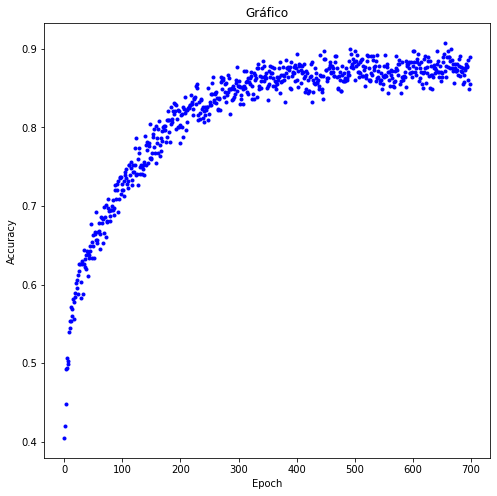

In [35]:
xx = np.array(history.epoch.tolist())
yy = np.array(history.accuracy.tolist())

fig = plt.figure(figsize=(8,8))
Plot = fig.add_subplot(111)

Plot.plot(xx, yy, "b.")

#Plot.axvline(x=Ei, c='red')
#Plot.axhline(y=npy.log(tauN), c='purple')

Plot.title.set_text("Gráfico")
Plot.set_xlabel("Epoch")
Plot.set_ylabel("Accuracy")


In [36]:
fig.savefig('../images/performance/700Epoch.jpg')

In [37]:
experiment.end()